In [ ]:
import numpy as np
import kepler # Import the kepler module
import matplotlib.pyplot as plt

In [ ]:
obj1parms = (10., 0.02, 70. * np.pi/180., 20. * np.pi/180., -15. * np.pi/180., 30. * 365.25, 1.88)
obj2parms = (15., 0.3, 85. * np.pi/180., 15. * np.pi/180., 5. * np.pi/180., 55. * 365.25, 8.66)

In [ ]:
def find_Mean_Anomaly(t,T,T0):
    M = (t-T0)/T * 2.*np.pi # [rad]  mean anomaly
    return M

In [ ]:
# Define time intervals
t_init = 0
t_final = 365*100 # 100 years
t_step = 10
t_intervals = np.arange(t_init, t_final, t_step) # array of time values at regular intervals

In [ ]:
x1_positions, y1_positions = [], []  # For object 1
x2_positions, y2_positions = [], []  # For object 2

In [ ]:
M1 = find_Mean_Anomaly(t_intervals, obj1parms[5], obj1parms[6])
M2 = find_Mean_Anomaly(t_intervals, obj2parms[5], obj2parms[6])
E1 = kepler.solve_Kepler(M1, obj1parms[1])
E2 = kepler.solve_Kepler(M2, obj2parms[1])
nu1 = kepler.find_True_Anomaly(E1, obj1parms[1])
nu2 = kepler.find_True_Anomaly(E2, obj2parms[1])
x1, y1, z1 = kepler.find_Space_Positions(obj1parms[0], obj1parms[1], obj1parms[2], obj1parms[3], obj1parms[4], nu1)
x2, y2, z2 = kepler.find_Space_Positions(obj2parms[0], obj2parms[1], obj2parms[2], obj2parms[3], obj2parms[4], nu2)



In [ ]:
plt.scatter(x1, y1, label='Object 1')
# Create a scatter plot for object 2 (x, y positions)
plt.title("HW2 EX1")
plt.scatter(x2, y2, label='Object 2')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

## HOMEWORK 2: Problem 2b
Time-series spectroscopy, obtained at regular intervals. Here, at each regularly spaced timestep (in MJD), we record a spectrum (in Jy) at evenly spaced wavelength intervals. Spectra obtained at different times all have the same wavelength grid.  
Consider defining the regularly spaced wavelength grid as metadata.  Be sure to be able to recover the timestamp of each spectrum – this may be done by recording the t0 and delta t as metadata.


In [ ]:
class InfoArray(np.ndarray):

    def __new__(subtype, shape, dtype=float, buffer=None, offset=0, strides=None, order=None, # these are all required arguments for numpy array construction
                info=None, # this is our additional metadata
                ):
        # Create the ndarray instance of our type, given the usual
        # ndarray input arguments.  This will call the standard
        # ndarray constructor, but return an object of our type.
        # It also triggers a call to InfoArray.__array_finalize__
        obj = super().__new__(subtype, shape, dtype,
                              buffer, offset, strides, order)

        # set the new 'info' attribute to the value passed
        obj.info = info
        
        return obj # return the newly created object

    def __array_finalize__(self, obj):
        # ``self`` is a new object resulting from
        # ndarray.__new__(InfoArray, ...), therefore it only has
        # attributes that the ndarray.__new__ constructor gave it -
        # i.e. those of a standard ndarray.
        #
        # We could have got to the ndarray.__new__ call in 3 ways:
        # From an explicit constructor - e.g. InfoArray():
        #    obj is None
        #    (we're in the middle of the InfoArray.__new__
        #    constructor, and self.info will be set when we return to
        #    InfoArray.__new__)
        if obj is None: return
        # From view casting - e.g arr.view(InfoArray):
        #    obj is arr
        #    (type(obj) can be InfoArray)
        # From new-from-template - e.g infoarr[:3]
        #    type(obj) is InfoArray


        # Note that it is here, rather than in the __new__ method,
        # that we set the default value for 'info', because this
        # method sees all creation of default objects - with the
        # InfoArray.__new__ constructor, but also with
        # arr.view(InfoArray).
        self.info = getattr(obj, 'info', None)


[-1.07801856e-03  4.65612272e-03  1.03902640e-02 ...  2.09113352e+01
  2.09170694e+01  2.09228035e+01]
[-2.70859983e-03  4.19113599e-04  3.54682702e-03 ...  1.14040623e+01
  1.14071900e+01  1.14103177e+01]


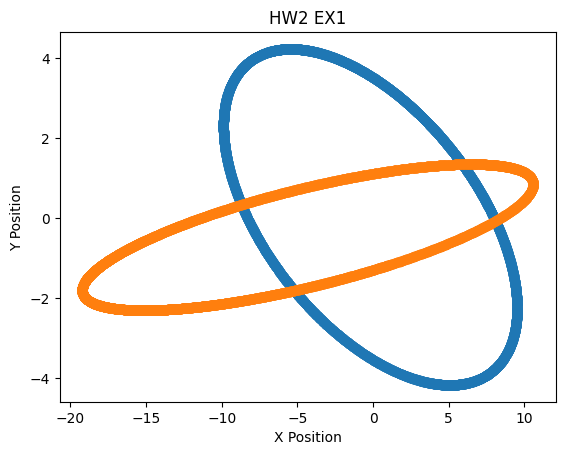

<Figure size 640x480 with 0 Axes>

In [1]:

import numpy as np
import kepler # Import the kepler module
import matplotlib.pyplot as plt

# Define Keplerian parameters for object 1 and object 2
# parameters in order are:
#    a      semimajor axis [AU]
#    e      eccentricity
#    inc    inclination [rad]
#    omega  argument of periastron [rad]
#    Omega  longitude of ascending node [rad]  relative to x axis, counterclockwise
#    T      period [days]
#    T0     time of periastron [days]

obj1parms = (10., 0.02, 70. * np.pi/180., 20. * np.pi/180., -15. * np.pi/180., 30. * 365.25, 1.88)
obj2parms = (15., 0.3, 85. * np.pi/180., 15. * np.pi/180., 5. * np.pi/180., 55. * 365.25, 8.66)

# Find Mean Anomaly, given the period T [days] and the time of periastron T0 [days].
def find_Mean_Anomaly(t,T,T0):
    M = (t-T0)/T * 2.*np.pi # [rad]  mean anomaly
    print(M)
    return M

# Define time intervals
t_init = 0
t_final = 365*100 # 100 years
t_step = 10
t_intervals = np.arange(t_init, t_final, t_step) # array of time values at regular intervals

# Compute the positions of objects 1 and 2 every 10 days until object 2 begins to reverse direction along the line of sight (z axis).

M1 = find_Mean_Anomaly(t_intervals, obj1parms[5], obj1parms[6])
M2 = find_Mean_Anomaly(t_intervals, obj2parms[5], obj2parms[6])
E1 = kepler.solve_Kepler(M1, obj1parms[1])
E2 = kepler.solve_Kepler(M2, obj2parms[1])
nu1 = kepler.find_True_Anomaly(E1, obj1parms[1])
nu2 = kepler.find_True_Anomaly(E2, obj2parms[1])
x1, y1, z1 = kepler.find_Space_Positions(obj1parms[0], obj1parms[1], obj1parms[2], obj1parms[3], obj1parms[4], nu1)
x2, y2, z2 = kepler.find_Space_Positions(obj2parms[0], obj2parms[1], obj2parms[2], obj2parms[3], obj2parms[4], nu2)


# Plot the positions of the objects

plt.scatter(x1, y1, label='Object 1')
plt.scatter(x2, y2, label='Object 2')
plt.title("HW2 EX1")
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()

# Save the plot to PDF

plt.savefig("HW2PROB1_image.pdf", format="pdf", bbox_inches="tight")